In [1]:
import os
import pandas as pd
import numpy as np

import datetime

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy import stats
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy.stats import pearsonr,spearmanr
import warnings
warnings.filterwarnings("ignore")#忽略警告
# import sklearn.neighbors._base
# import sys
# sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base
# from missingpy import KNNImputer
# from missingpy import MissForest


# from sklearn.preprocessing import MinMaxScaler,StandardScaler


# from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score

In [2]:
dataset=pd.read_csv('./data/preprocessed/data.csv')

In [3]:
dataset['Date']=pd.to_datetime(dataset['Date'].astype('str'))
dataset.set_index('Date',drop=True,inplace=True)

In [4]:
dataset.describe()

,Price,GDP,netimport,EV,carbon,crude,gas,temp,precip,wind
count,1216.000000,1216.000000,1216.000000,1216.000000,1216.000000,1216.000000,1216.000000,1216.000000,1216.000000,1216.000000
mean,31.572574,52885.610116,-25.125105,30.988368,38.777585,63.402135,3.015321,8.078947,1.532006,20.073594
std,21.361478,612.973050,1.074505,12.975762,20.496392,18.490605,1.182590,7.386401,0.280668,1.954251
min,1.130000,51541.655729,-26.464246,8.626756,14.334297,19.057768,1.482000,-11.700000,0.018710,15.779212
25%,15.625000,52392.967691,-26.081828,18.764119,24.277546,51.388898,2.262006,2.800000,1.356842,18.801320
50%,30.995000,53130.589599,-25.324440,33.240645,27.119678,63.950001,2.660000,6.800000,1.593022,19.921641
75%,41.565000,53376.439419,-24.315648,43.764450,53.322466,72.113883,3.614750,14.100000,1.733053,21.479832
max,233.690000,53692.527337,-22.185925,46.808859,97.510000,127.980003,8.131248,26.100000,4.221935,24.381298


__The Dataset contains 10 type of data__

1.Swedish power price(EUR/MWh)https://www.nordpoolgroup.com/en/Market-data1/Dayahead/Area-Prices/SE/Hourly1/?view=table

2.GDP per capita of Sweden (constant 2015 USD)https://data.worldbank.org/indicator/NY.GDP.PCAP.KD?locations=SE&view=chart

3.Net import of Sweden (TWh) https://ourworldindata.org/grapher/net-electricity-imports?tab=chart&region=Europe&country=~SWE

4.Electric vehicle sales share in Sweden(%)https://www.iea.org/articles/global-ev-data-explorer

5.Carbon auction price (€/tCO2) https://www.eex.com/en/market-data/environmental-markets/eua-primary-auction-spot-download

6.Brend Oil price(USD)https://finance.yahoo.com/quote/BZ%3DF/history?p=BZ%3DF

7.Natural Gas price(USD)https://finance.yahoo.com/quote/NG%3DF/history?p=NG%3DF

Weather of Sweden:

https://www.visualcrossing.com/weather/weather-data-services/sweden/metric/last15days

8.Temperature of Sweden(℃)

9.precipitation of Sweden(mm)

10.wind speed of Sweden(kph)

### Stationarity of time series

In [5]:
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller as ADF

In [6]:
def diff(data):
    for n in data.iloc[:,0:]: 
        timeseries=pd.DataFrame(data[str(n)])
        timeseries_diff1 = timeseries.diff(1)
        timeseries_diff2 = timeseries_diff1.diff(1)

        timeseries_diff1 = timeseries_diff1.fillna(0)
        timeseries_diff2 = timeseries_diff2.fillna(0)


        timeseries_adf = ADF(timeseries[str(n)].tolist())
        timeseries_diff1_adf = ADF(timeseries_diff1[str(n)].tolist())
        timeseries_diff2_adf = ADF(timeseries_diff2[str(n)].tolist())
        
        print(str(n)+':')
        print('timeseries_adf : ', timeseries_adf)
        print('timeseries_diff1_adf : ', timeseries_diff1_adf)
        print('timeseries_diff2_adf : ', timeseries_diff2_adf)

        plt.figure(figsize=(16, 12))
        plt.plot(timeseries, label='Original', color='blue')
        plt.plot(timeseries_diff1, label='Diff1', color='red')
        plt.plot(timeseries_diff2, label='Diff2', color='purple')
        plt.legend(loc='best')
        plt.show()
        print('\n\n\n')

Price:
timeseries_adf :  (-6.02302930232816, 1.4781655496628095e-07, 8, 1207, {'1%': -3.43577938005948, '5%': -2.863937543790164, '10%': -2.568046493171221}, 8901.796831456493)
timeseries_diff1_adf :  (-11.278329323104153, 1.4774299680773863e-20, 21, 1194, {'1%': -3.4358386217286885, '5%': -2.8639636801920956, '10%': -2.5680604125597277}, 8921.014215156452)
timeseries_diff2_adf :  (-13.73808261732291, 1.1076026174738256e-25, 23, 1192, {'1%': -3.4358478507713777, '5%': -2.863967751840151, '10%': -2.568062580992973}, 9017.637805653274)


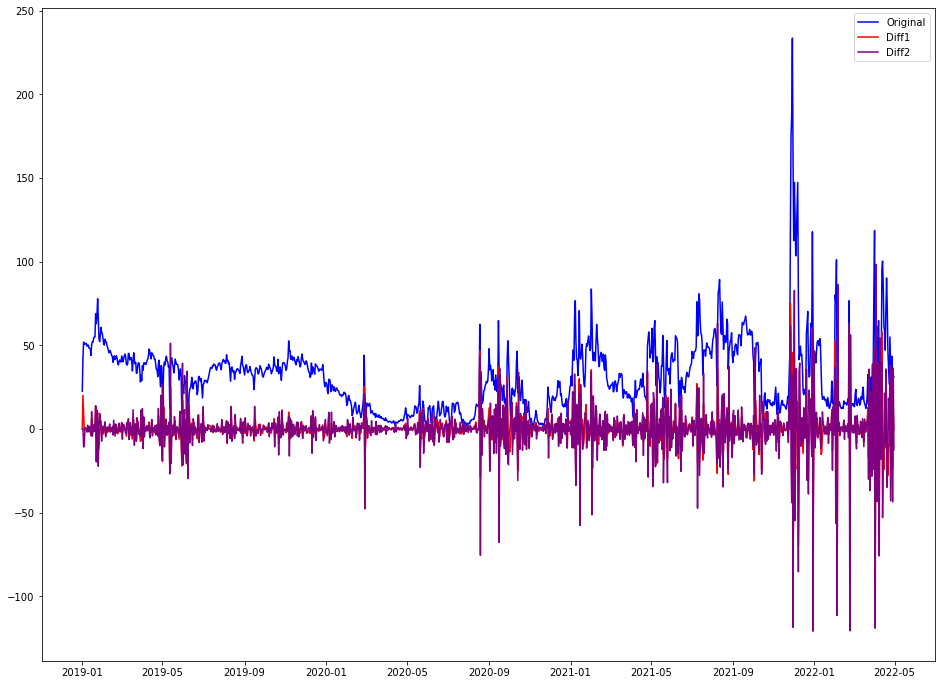





GDP:
timeseries_adf :  (-2.749659425016779, 0.06583211186344408, 1, 1214, {'1%': -3.4357480073434905, '5%': -2.863923702481129, '10%': -2.568039121778048}, 1445.2143807217196)
timeseries_diff1_adf :  (-1.6789834421426661, 0.44197206805561967, 0, 1215, {'1%': -3.435743555099632, '5%': -2.8639217381867486, '10%': -2.568038075665972}, 1450.7328184571138)
timeseries_diff2_adf :  (-34.82967417220259, 0.0, 0, 1215, {'1%': -3.435743555099632, '5%': -2.8639217381867486, '10%': -2.568038075665972}, 1453.5438469784306)


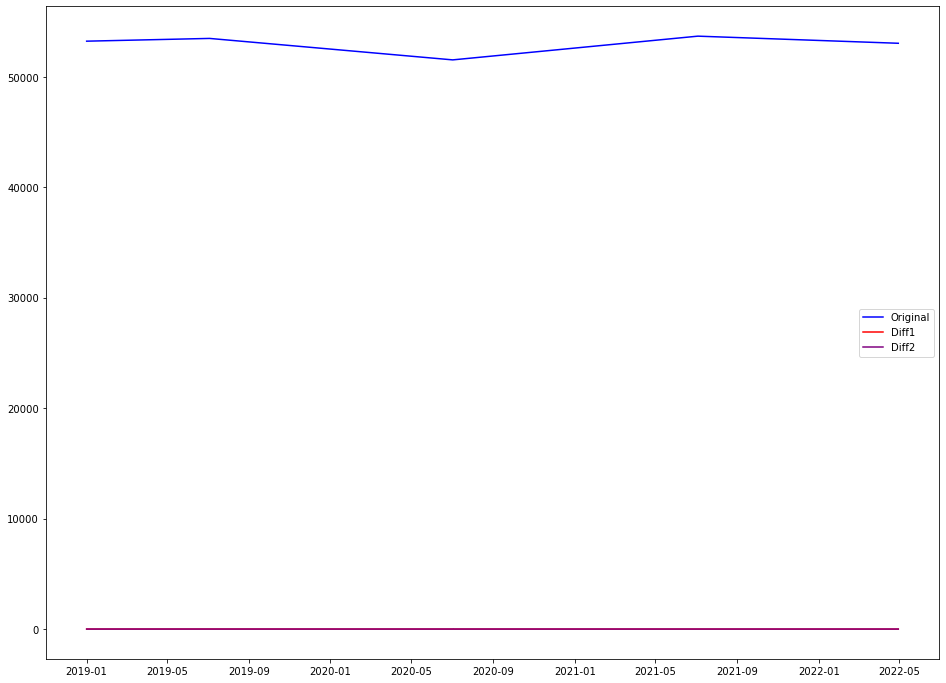





netimport:
timeseries_adf :  (-1.0141800283999192, 0.7480573912782253, 23, 1192, {'1%': -3.4358478507713777, '5%': -2.863967751840151, '10%': -2.568062580992973}, -3117.7802035088116)
timeseries_diff1_adf :  (-2.9878378552077036, 0.03604590769279379, 23, 1192, {'1%': -3.4358478507713777, '5%': -2.863967751840151, '10%': -2.568062580992973}, -3123.2427013584656)
timeseries_diff2_adf :  (-15.580184333699046, 1.9370579877048816e-28, 23, 1192, {'1%': -3.4358478507713777, '5%': -2.863967751840151, '10%': -2.568062580992973}, -3121.1867730834692)


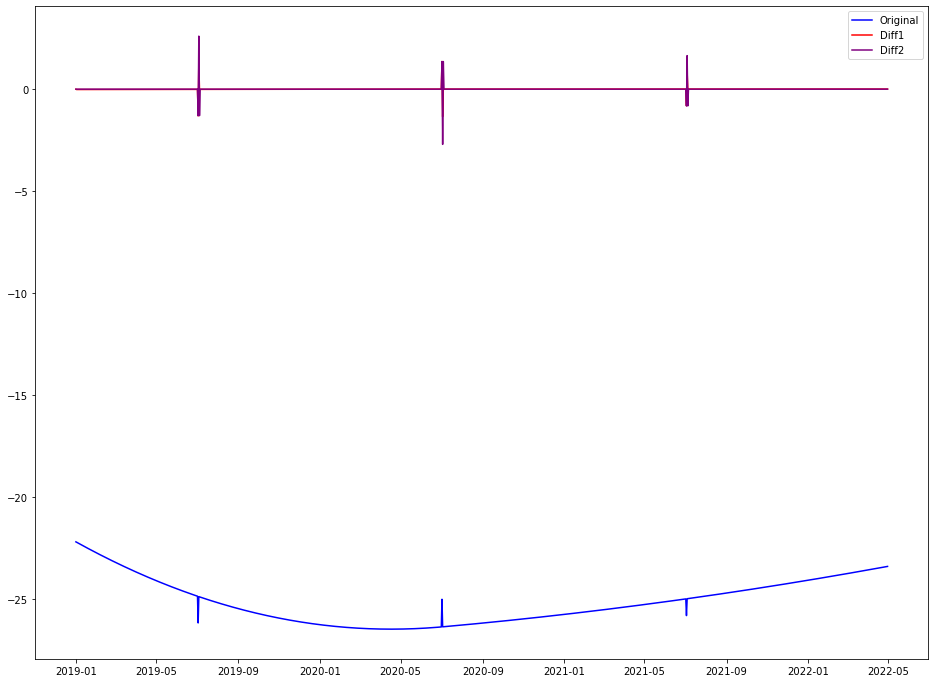





EV:
timeseries_adf :  (-2.457988431853565, 0.1260335836427297, 23, 1192, {'1%': -3.4358478507713777, '5%': -2.863967751840151, '10%': -2.568062580992973}, -2015.2185290769517)
timeseries_diff1_adf :  (-1.442077150016071, 0.5619459692565707, 23, 1192, {'1%': -3.4358478507713777, '5%': -2.863967751840151, '10%': -2.568062580992973}, -2015.797439286042)
timeseries_diff2_adf :  (-15.506657470716343, 2.377560804658135e-28, 23, 1192, {'1%': -3.4358478507713777, '5%': -2.863967751840151, '10%': -2.568062580992973}, -2020.431725127161)


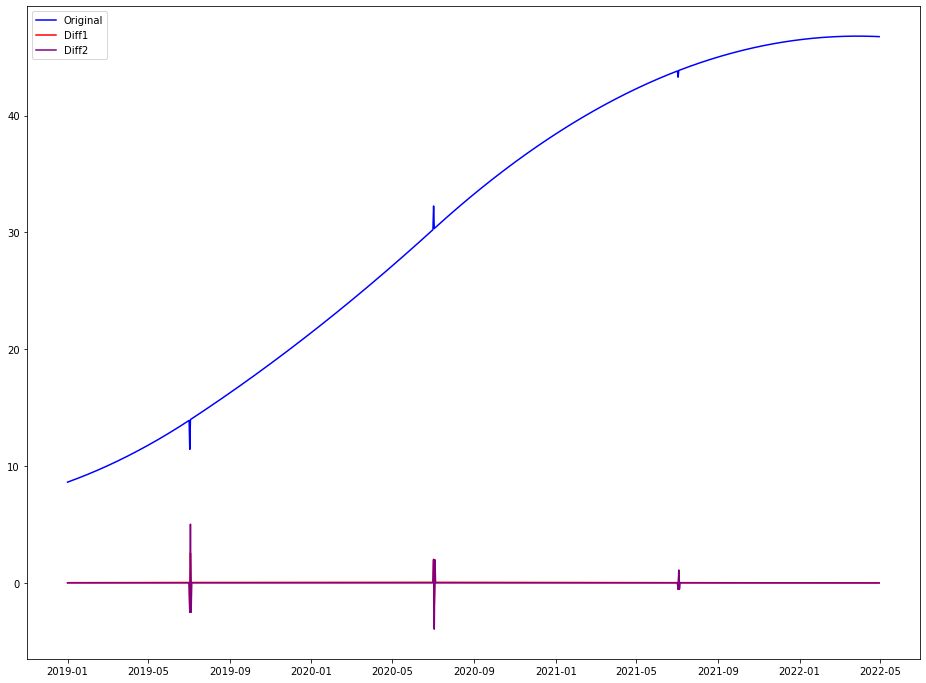





carbon:
timeseries_adf :  (0.20107369988846732, 0.9723217502323476, 8, 1207, {'1%': -3.43577938005948, '5%': -2.863937543790164, '10%': -2.568046493171221}, 2396.9273496802266)
timeseries_diff1_adf :  (-13.534003313782316, 2.5887557324335446e-25, 7, 1208, {'1%': -3.4357748759345768, '5%': -2.8639355566269677, '10%': -2.5680454348767596}, 2394.982479244135)
timeseries_diff2_adf :  (-14.112706887542537, 2.5035133899411205e-26, 19, 1196, {'1%': -3.435829423619109, '5%': -2.863959622178626, '10%': -2.5680582513898056}, 2460.58706893778)


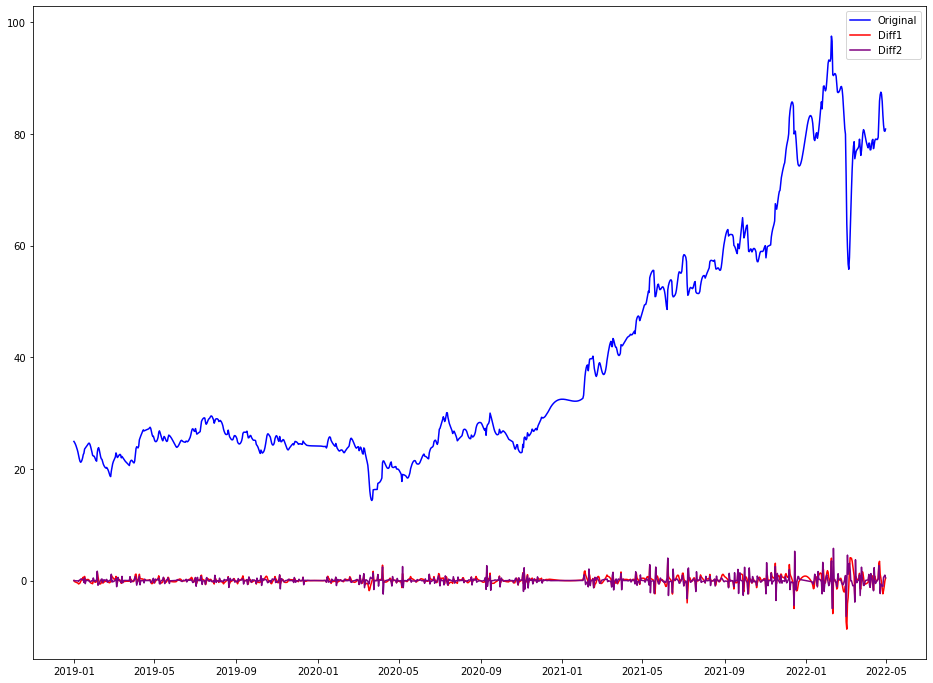





crude:
timeseries_adf :  (0.20653129689659214, 0.9726255445074435, 8, 1207, {'1%': -3.43577938005948, '5%': -2.863937543790164, '10%': -2.568046493171221}, 4274.597289772318)
timeseries_diff1_adf :  (-14.248828049270267, 1.4932451667565934e-26, 7, 1208, {'1%': -3.4357748759345768, '5%': -2.8639355566269677, '10%': -2.5680454348767596}, 4272.640844290127)
timeseries_diff2_adf :  (-14.500689121095382, 5.939339362171189e-27, 21, 1194, {'1%': -3.4358386217286885, '5%': -2.8639636801920956, '10%': -2.5680604125597277}, 4321.776135178222)


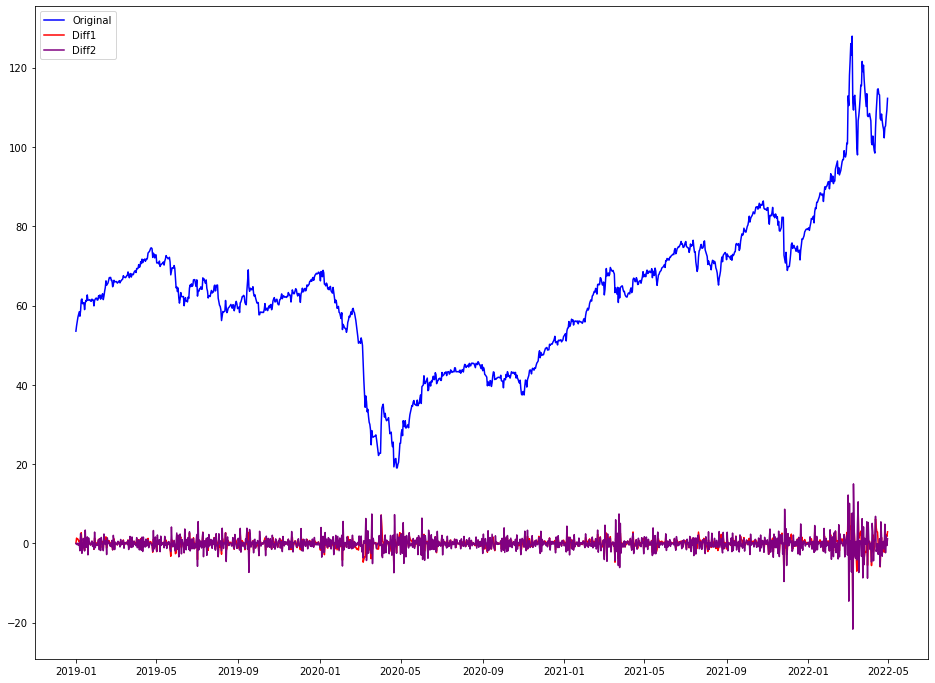





gas:
timeseries_adf :  (0.68788537570431, 0.9895929746800147, 22, 1193, {'1%': -3.43584323237365, '5%': -2.863965714307509, '10%': -2.5680614958661483}, -1481.0546166117406)
timeseries_diff1_adf :  (-6.383589184186823, 2.191775577151989e-08, 21, 1194, {'1%': -3.4358386217286885, '5%': -2.8639636801920956, '10%': -2.5680604125597277}, -1482.5710486574558)
timeseries_diff2_adf :  (-14.912729660948111, 1.4503170899544827e-27, 22, 1193, {'1%': -3.43584323237365, '5%': -2.863965714307509, '10%': -2.5680614958661483}, -1448.0304383505832)


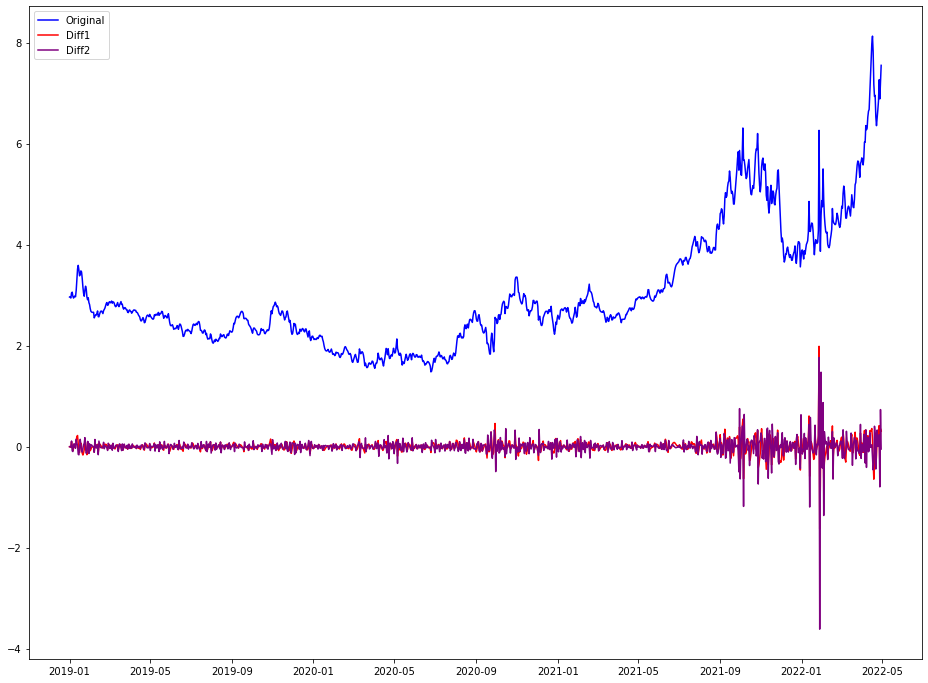





temp:
timeseries_adf :  (-2.5411847523465747, 0.10577241781630448, 13, 1202, {'1%': -3.43580201334162, '5%': -2.8639475292642795, '10%': -2.5680518110968684}, 5129.40351846162)
timeseries_diff1_adf :  (-13.126954878355953, 1.5221472178766952e-24, 12, 1203, {'1%': -3.4357974716016093, '5%': -2.8639455255208186, '10%': -2.5680507439699447}, 5134.51157916949)
timeseries_diff2_adf :  (-14.168941684832866, 2.0191265898601157e-26, 23, 1192, {'1%': -3.4358478507713777, '5%': -2.863967751840151, '10%': -2.568062580992973}, 5214.8224241134685)


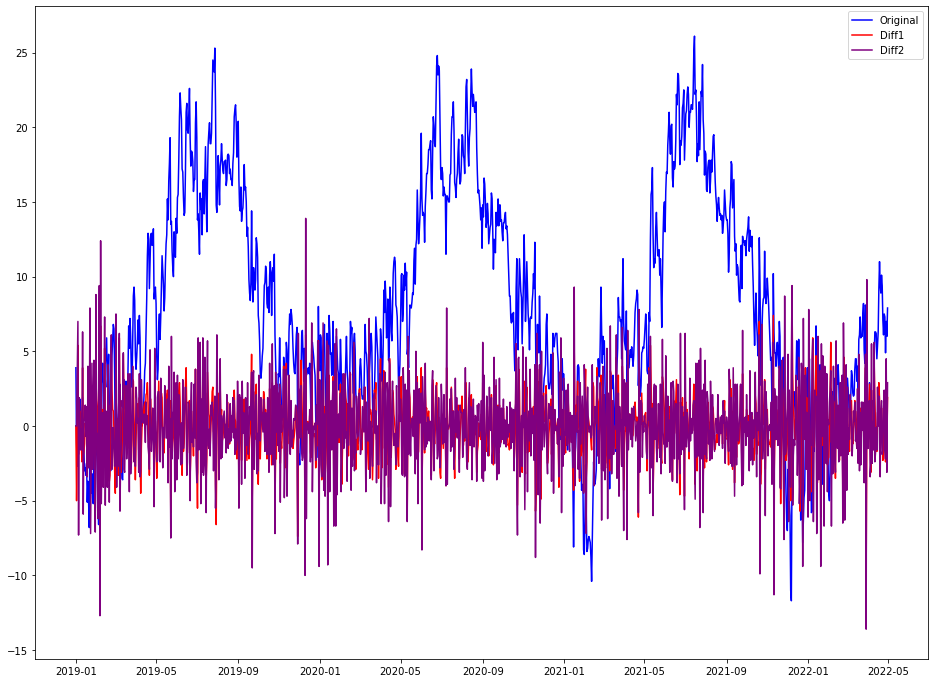





precip:
timeseries_adf :  (-0.8851722518649127, 0.7928161821556624, 19, 1196, {'1%': -3.435829423619109, '5%': -2.863959622178626, '10%': -2.5680582513898056}, -723.6363504888)
timeseries_diff1_adf :  (-13.297808657314377, 7.14721390080945e-25, 18, 1197, {'1%': -3.4358248361156765, '5%': -2.8639575982634757, '10%': -2.5680571735171958}, -724.9224417343726)
timeseries_diff2_adf :  (-15.594281981424253, 1.8633362268261943e-28, 23, 1192, {'1%': -3.4358478507713777, '5%': -2.863967751840151, '10%': -2.568062580992973}, -600.8617749954569)


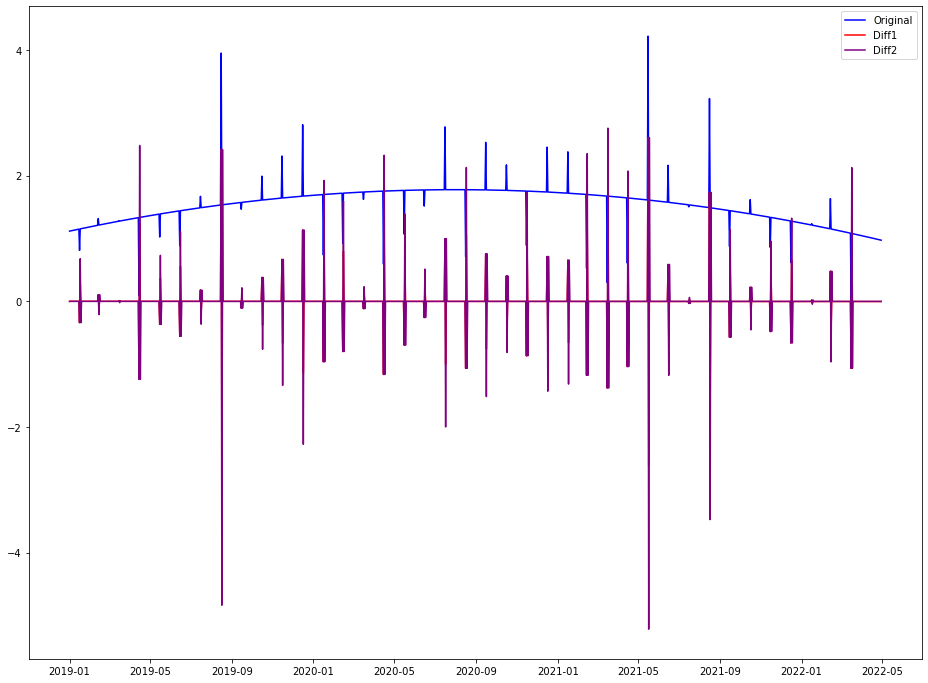





wind:
timeseries_adf :  (-3.510921474326155, 0.007710997798131742, 6, 1209, {'1%': -3.435770379276604, '5%': -2.8639335727551223, '10%': -2.5680443783356286}, -18775.837990319247)
timeseries_diff1_adf :  (-6.033508537080592, 1.3996794210412052e-07, 5, 1210, {'1%': -3.4357658900670085, '5%': -2.8639315921664568, '10%': -2.5680433235434736}, -18766.41349691799)
timeseries_diff2_adf :  (-9.398939249450958, 6.263261401911049e-16, 5, 1210, {'1%': -3.4357658900670085, '5%': -2.8639315921664568, '10%': -2.5680433235434736}, -18730.91724547702)


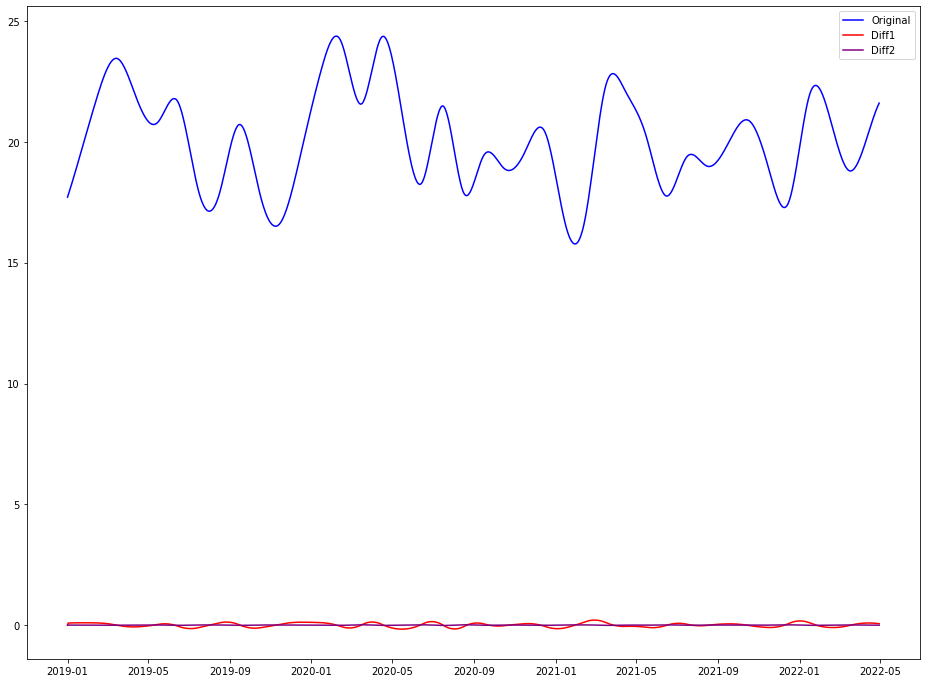

In [7]:
diff(dataset)

### Data Relationships

Variables within a dataset can be related for lots of reasons, for example:

-One variable could cause or depend on the values of another variable.

-One variable could be lightly associated with another variable.

-Two variables could depend on a third unknown variable.

Therefore to study the statistical relationship between two variables we define convariance and correlation.

### Convariance 

Covariance is a measure of how much two random variables vary together (e.g the temperature and precipitation in a city). In the covariance matrix the off-diagonal elements contain the covariances of each pair of variables. The diagonal elements of the covariance matrix contain the variances of each variable. 

    If COV(xi, xj) = 0 then variables are uncorrelated.
    If COV(xi, xj) > 0 then variables positively correlated 
    If COV(xi, xj) < 0 then variables negatively correlated 

If the covariance is positive then the variables grow together, while a negative covariance means they move inversely. A null value means variables are independent.


### Variance
Variance measures the variation of a single random variable (e.g temperature in a city), how much the data are scattered about the mean.
The variance is equal to the square of the standard deviation.

### Correlation

While covariance indicates the direction of the linear relationship between variables, correlation measures both the strength and direction of the linear relationship between two variables. correlation is a function of covariance.

In [8]:
def relationship(dataset):
    x=dataset.iloc[:,0]
    for n in dataset.iloc[:,1:]:    
        print('The relationship between power price and ' + str(n)+':')
        y=dataset[str(n)]
        plt.scatter(x,y)
        plt.show()
        Covariance = np.cov(x, y)
        sns.heatmap(Covariance, annot=True, fmt='g')
        plt.show()
        corr1, _ = pearsonr(x, y)
        corr2, _ = spearmanr(x, y)
        print("Covariance Matrix\n", Covariance)
        print("Pearsonr Correlation", corr1)
        print("Spearmanr Correlation %r \n\n\n"%(corr2))

The relationship between power price and GDP:


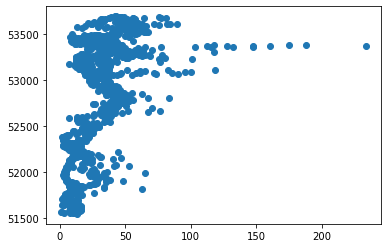

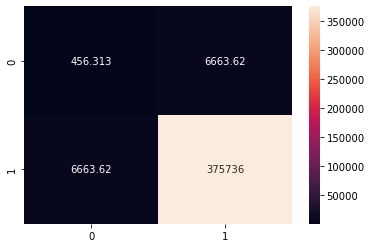

Covariance Matrix
 [[   456.31274357   6663.61659163]
 [  6663.61659163 375735.96028863]]
Pearsonr Correlation 0.5089057069887497
Spearmanr Correlation 0.5655387723387664 



The relationship between power price and netimport:


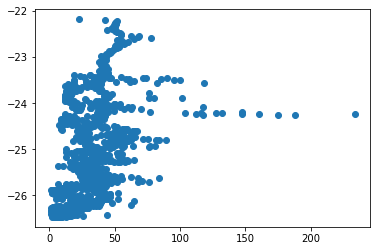

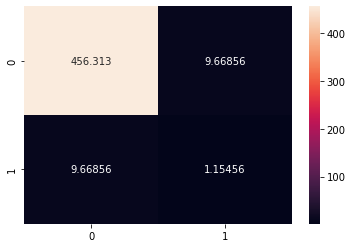

Covariance Matrix
 [[456.31274357   9.66855618]
 [  9.66855618   1.1545602 ]]
Pearsonr Correlation 0.4212326583297683
Spearmanr Correlation 0.5194609393729999 



The relationship between power price and EV:


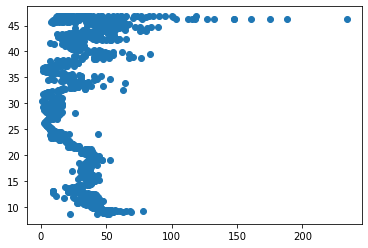

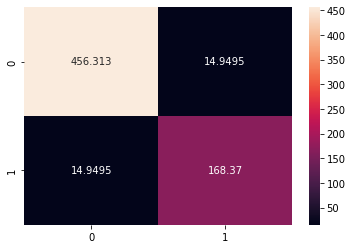

Covariance Matrix
 [[456.31274357  14.94947291]
 [ 14.94947291 168.37040111]]
Pearsonr Correlation 0.05393388544668742
Spearmanr Correlation -0.024427196698794795 



The relationship between power price and carbon:


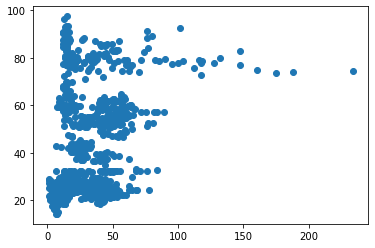

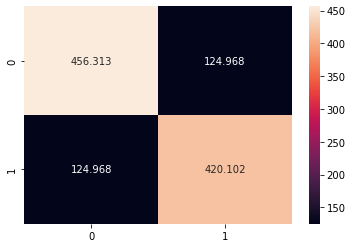

Covariance Matrix
 [[456.31274357 124.96835864]
 [124.96835864 420.1020922 ]]
Pearsonr Correlation 0.28542456296539187
Spearmanr Correlation 0.25034396505918877 



The relationship between power price and crude:


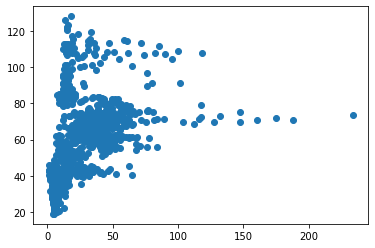

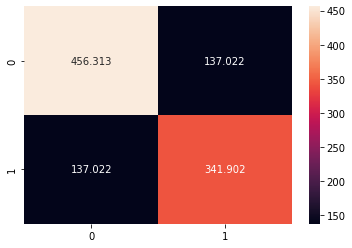

Covariance Matrix
 [[456.31274357 137.02233799]
 [137.02233799 341.90248757]]
Pearsonr Correlation 0.34690370997908904
Spearmanr Correlation 0.4297880741186452 



The relationship between power price and gas:


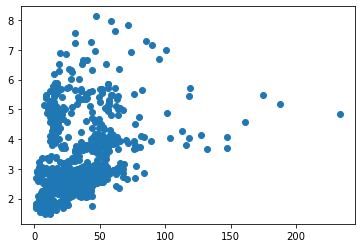

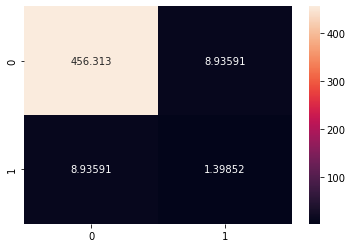

Covariance Matrix
 [[456.31274357   8.93590618]
 [  8.93590618   1.39852017]]
Pearsonr Correlation 0.35373084752426665
Spearmanr Correlation 0.44365257500902155 



The relationship between power price and temp:


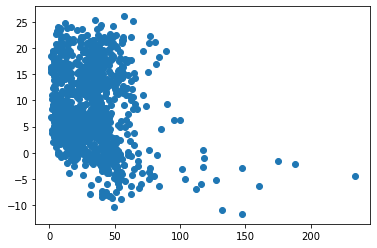

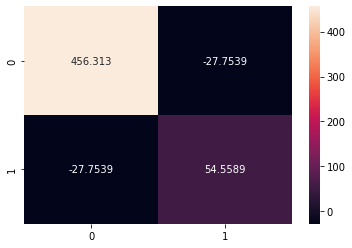

Covariance Matrix
 [[456.31274357 -27.75391367]
 [-27.75391367  54.55891445]]
Pearsonr Correlation -0.17589766482153862
Spearmanr Correlation -0.12984467168972372 



The relationship between power price and precip:


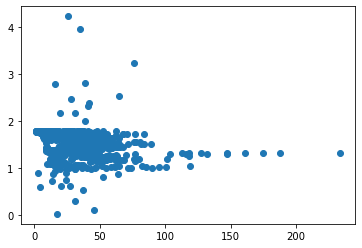

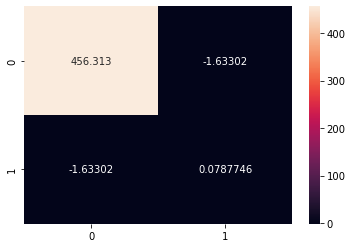

Covariance Matrix
 [[ 4.56312744e+02 -1.63302183e+00]
 [-1.63302183e+00  7.87746352e-02]]
Pearsonr Correlation -0.27237515514868604
Spearmanr Correlation -0.4579753672032354 



The relationship between power price and wind:


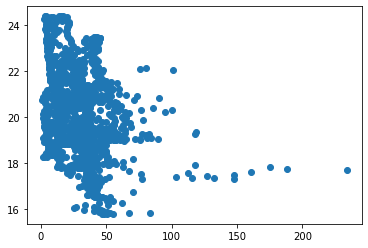

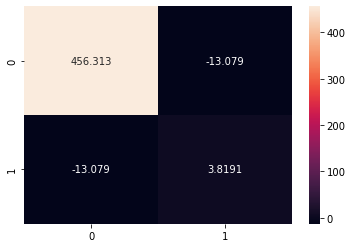

Covariance Matrix
 [[456.31274357 -13.07904654]
 [-13.07904654   3.81909637]]
Pearsonr Correlation -0.3133029454319329
Spearmanr Correlation -0.308545645468987 





In [9]:
relationship(dataset)

In [10]:
def autocorrelation(timeseries, lags):
    fig = plt.figure(figsize=(12, 8))
    ax1 = fig.add_subplot(211)
    sm.graphics.tsa.plot_acf(timeseries, lags=lags, ax=ax1)
    ax2 = fig.add_subplot(212)
    sm.graphics.tsa.plot_pacf(timeseries, lags=lags, ax=ax2)
    plt.show()

In [11]:
price=pd.DataFrame(dataset['Price'])
price_diff1 = price.diff(1)
price_diff2 = price_diff1.diff(1)
price_diff1 = price_diff1.fillna(0)
price_diff2 = price_diff2.fillna(0)

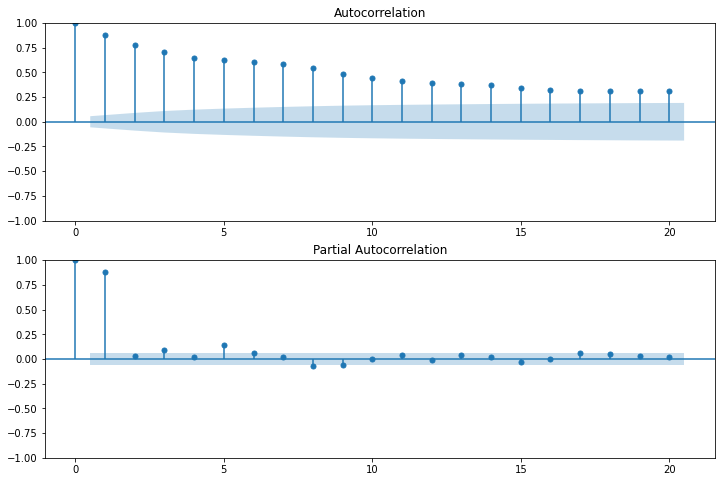

In [12]:
autocorrelation(price, 20)

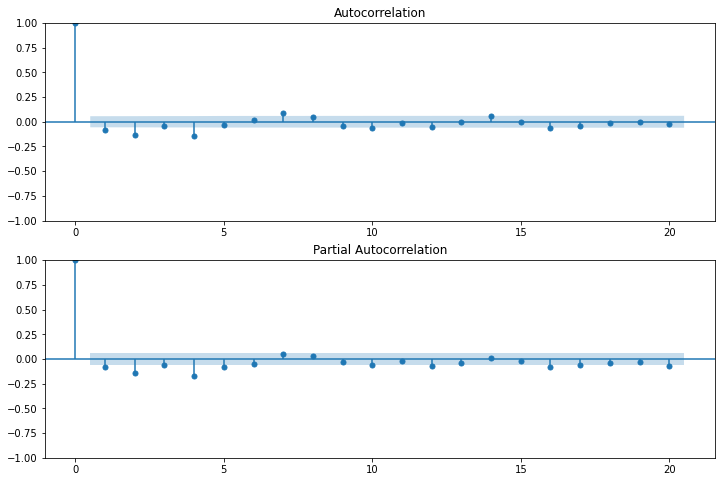

In [13]:
autocorrelation(price_diff1, 20)

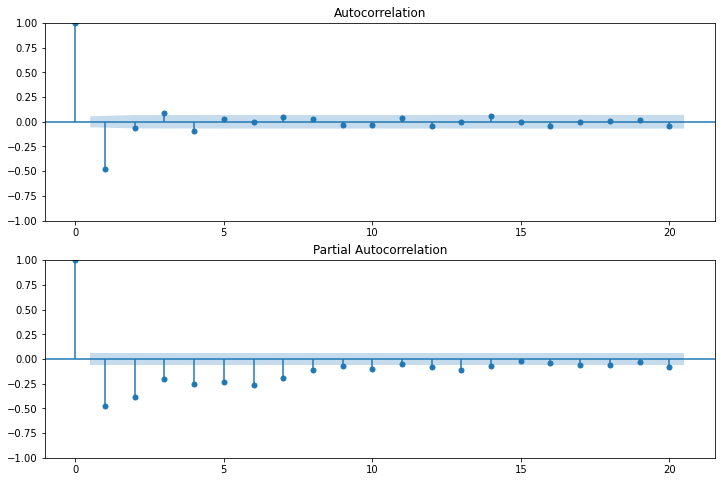

In [14]:
autocorrelation(price_diff2, 20)

## Exploratory data analysis

Let's now explore the properties of the dataset. Time series data normally comprises of three main components:
- Trend represents the overall tendency of the data to increase or decrease over time.
- Seasonality is related to the presence of recurrent patterns that appear after regular intervals (like seasons).
- Random noise is often hard to explain and represents all those changes in the data that seem unexpected. Sometimes sudden changes are related to fixed or predictable events (i.e., public holidays).

### Time series decomposition

In [15]:
def decomposing(data):
    for n in data.iloc[:,0:]: 
        timeseries=pd.DataFrame(data[str(n)])
        decomposition = seasonal_decompose(timeseries)
        trend = decomposition.trend
        seasonal = decomposition.seasonal
        residual = decomposition.resid
        print(str(n)+':')
        plt.figure(figsize=(16, 12))
        plt.subplot(411)
        plt.plot(timeseries, label='Original')
        plt.legend(loc='best')
        plt.subplot(412)
        plt.plot(trend, label='Trend')
        plt.legend(loc='best')
        plt.subplot(413)
        plt.plot(seasonal, label='Seasonarity')
        plt.legend(loc='best')
        plt.subplot(414)
        plt.plot(residual, label='Residual')
        plt.legend(loc='best')
        plt.show()
        print('\n\n\n')

Price:


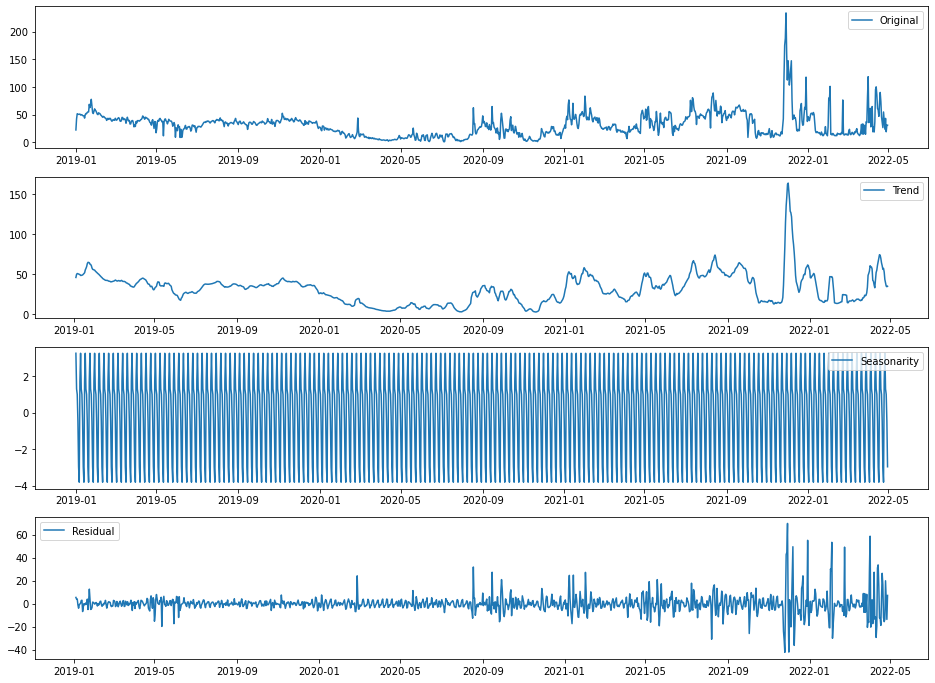





GDP:


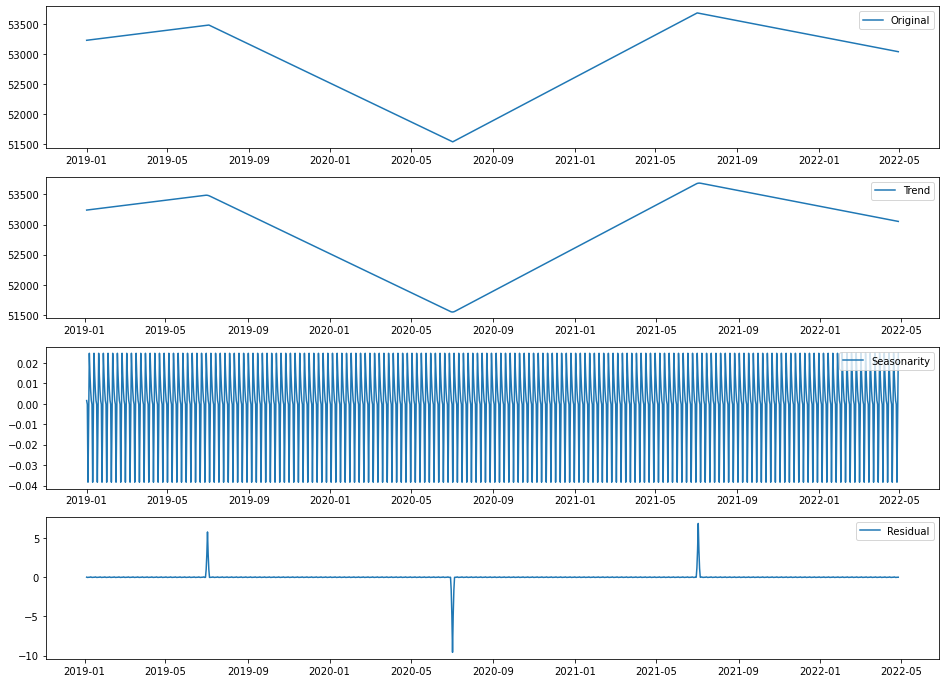





netimport:


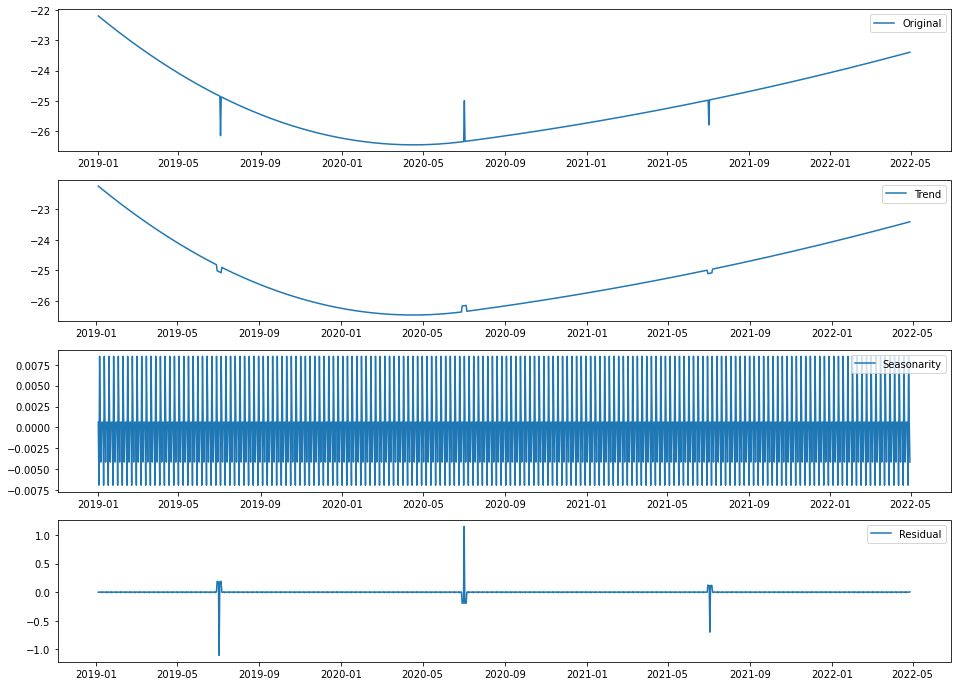





EV:


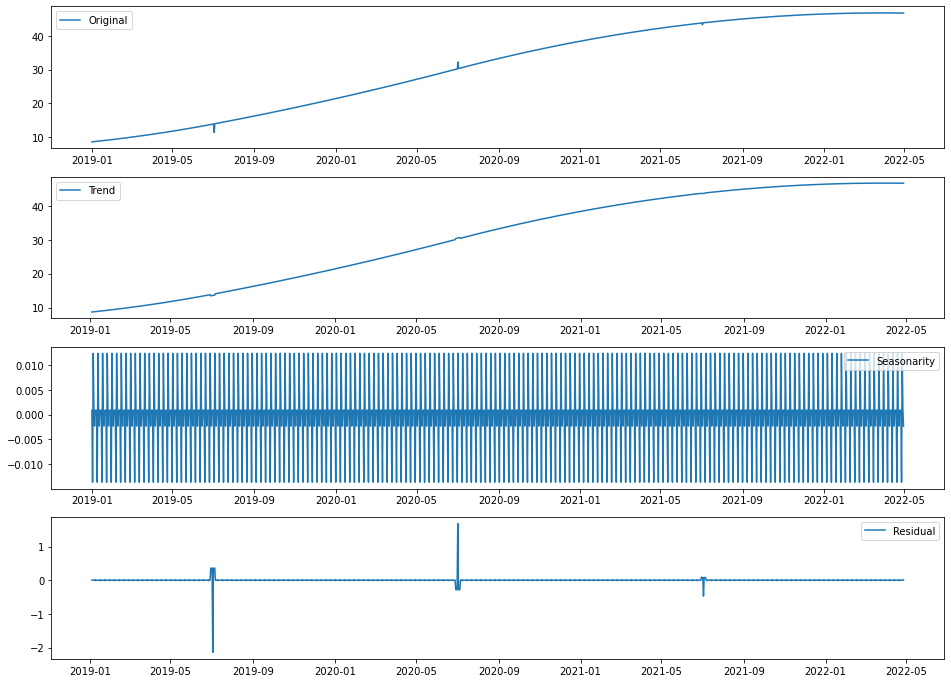





carbon:


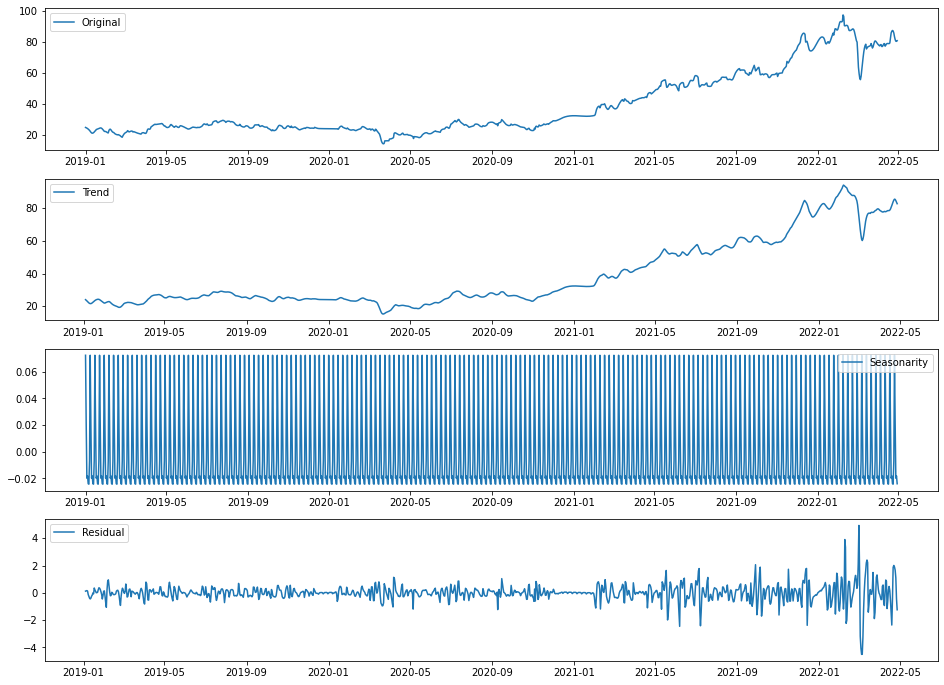





crude:


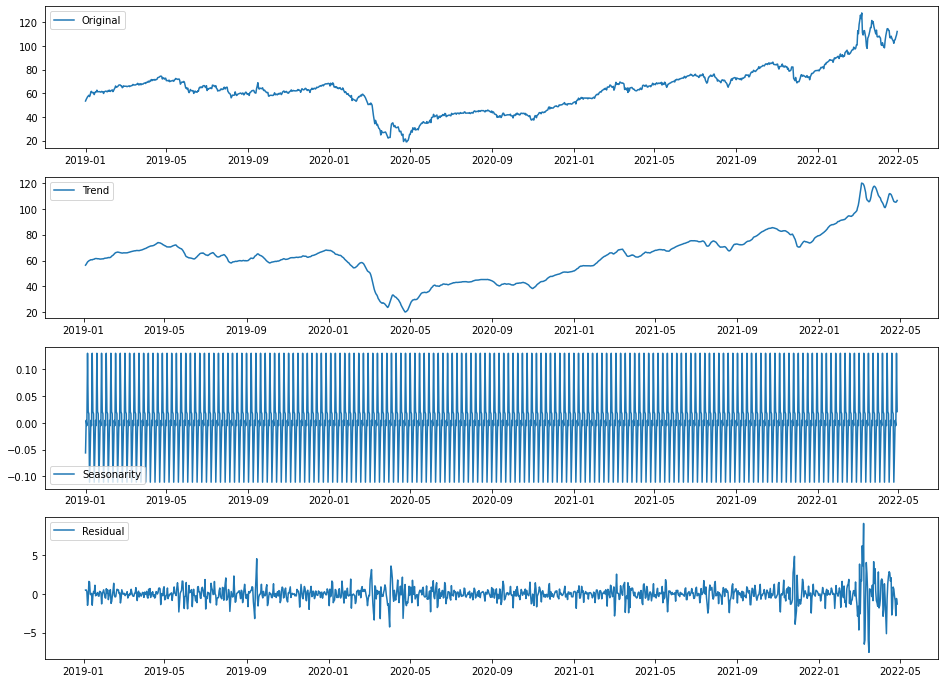





gas:


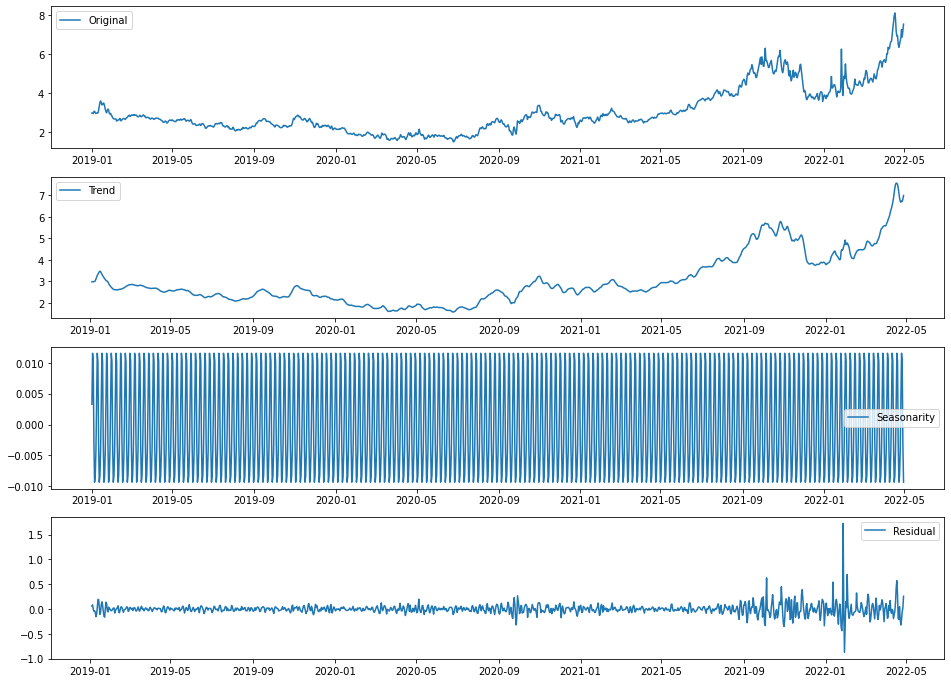





temp:


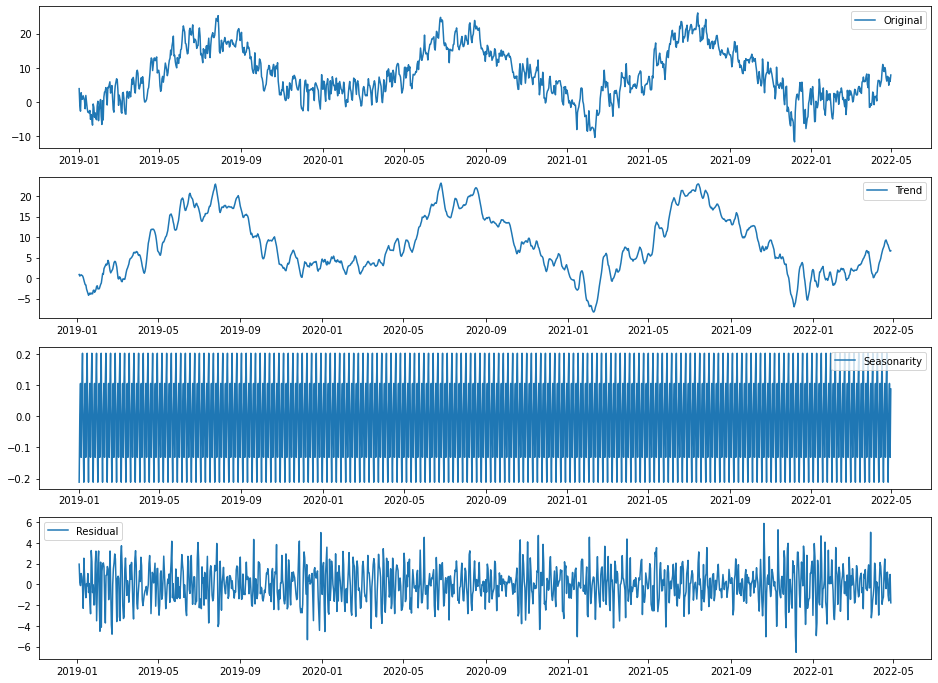





precip:


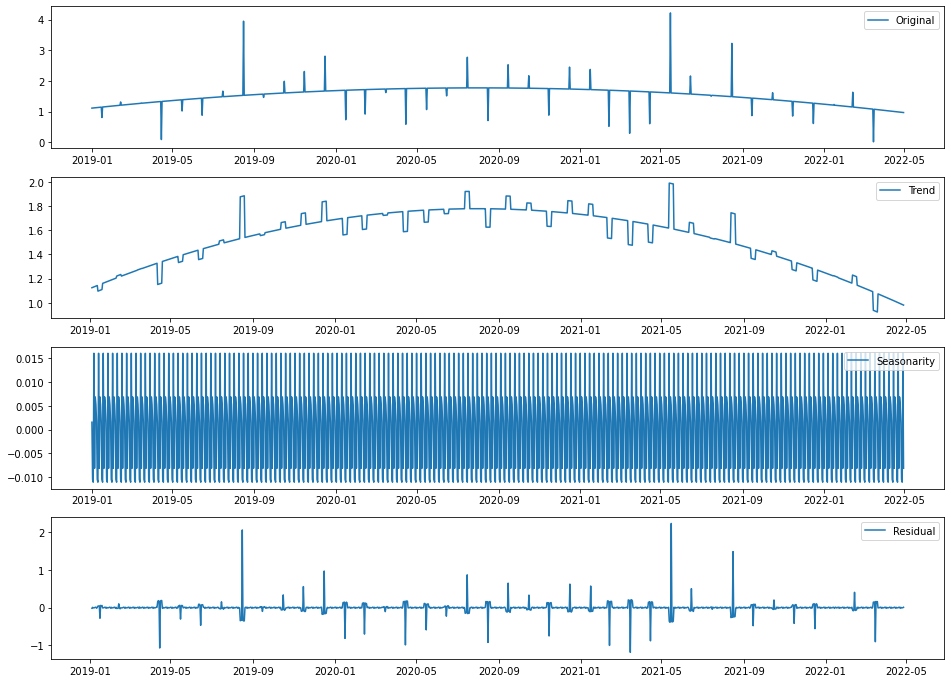





wind:


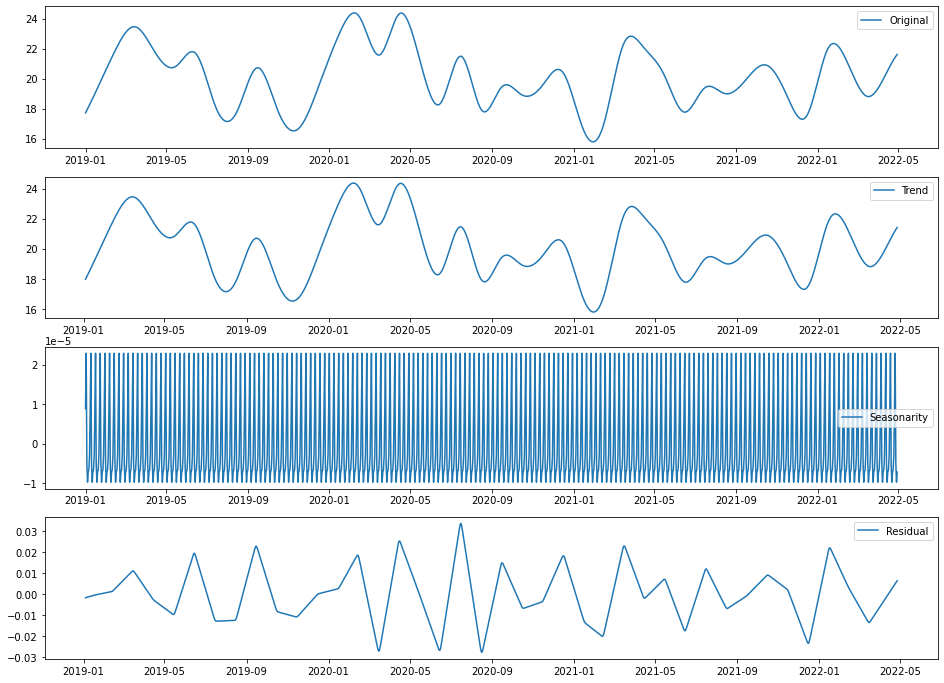

In [16]:
decomposing(dataset)

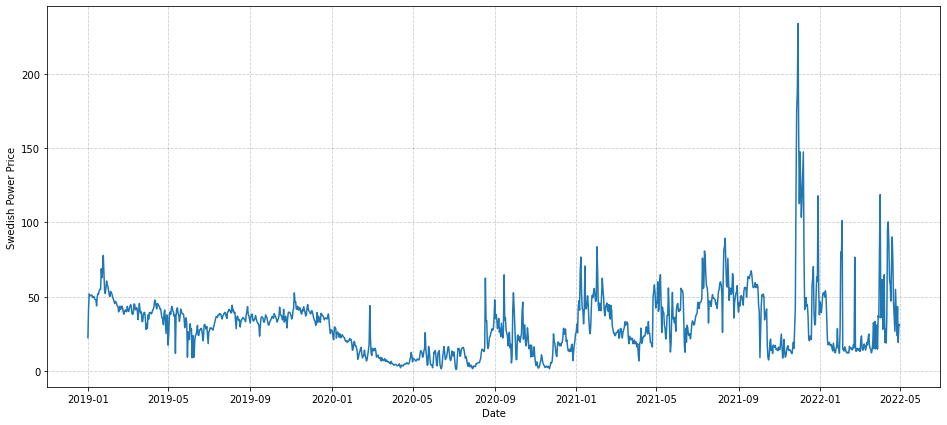

In [17]:
fig, ax = plt.subplots(figsize=(16, 7))
ax.plot(price)
ax.grid(ls='--', c='k', alpha=0.2)
# ax.set_ylim(0, 70000)
ax.set_xlabel('Date')
ax.set_ylabel('Swedish Power Price')
plt.show()

### Explore seasonal cycles using a 30-day rolling average

In [18]:
seasonal_cycle = price.rolling(window=30, center=True).mean().groupby(price.index.dayofyear).mean()
q25 = price.rolling(window=30, center=True).mean().groupby(price.index.dayofyear).quantile(0.25)
q75 = price.rolling(window=30, center=True).mean().groupby(price.index.dayofyear).quantile(0.75)

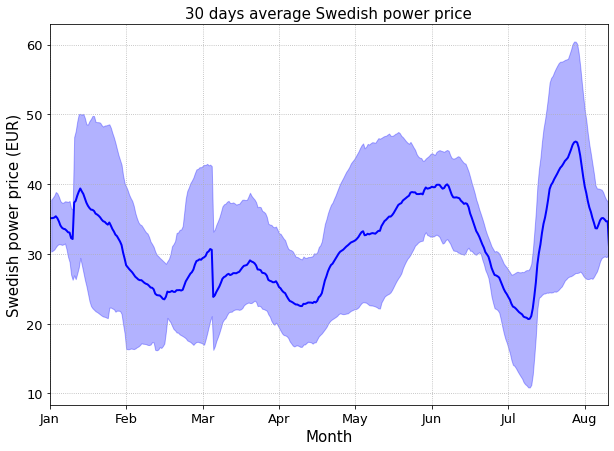

In [19]:
from calendar import day_abbr, month_abbr, mdays
ndays_m = mdays.copy()
ndays_m[2] = 29
ndays_m = np.cumsum(ndays_m)
month_ticks = month_abbr[1:]
f, ax = plt.subplots(figsize=(10,7)) 

seasonal_cycle.plot(ax=ax, lw=2, color='b', legend=False)
ax.fill_between(seasonal_cycle.index, q25.values.ravel(), q75.values.ravel(), color='b', alpha=0.3)
ax.set_xticklabels(month_ticks)
ax.grid(ls=':')
ax.set_xlabel('Month', fontsize=15)
ax.set_ylabel('Swedish power price (EUR)', fontsize=15);
ax.set_xlim(0, 365)
[l.set_fontsize(13) for l in ax.xaxis.get_ticklabels()]
[l.set_fontsize(13) for l in ax.yaxis.get_ticklabels()]

ax.set_title('30 days average Swedish power price', fontsize=15)
plt.show()

### Explore dependency on year and month via carpet plot/heatmap

Heatmaps (also called carpet plots) can give us useful information about the structure of the data. Pandas provides very handy functions to explore relevant dependencies. For example, here we show how the mean Number of Santander Cycles Hires varies as a function of the year and month. 

Although the number of hires seems to be increasing over time, this increase is not monotonic and probably depends on other factors as well. On the other hand, the carpet plot confirms the general trend shown before, with a higher usage of rented bikes over the warmer months. 

In [20]:
month_year = price.copy()
month_year.loc[:,'year'] = month_year.index.year
month_year.loc[:,'month'] = month_year.index.month
month_year = month_year.groupby(['year','month']).mean().unstack()
month_year.columns = month_year.columns.droplevel(0)

month_year

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2019,53.500645,45.189286,39.324839,39.687,34.815161,24.466667,34.923548,36.876774,34.074667,36.360968,41.233667,35.140968
2020,23.264839,14.390000,9.001935,5.126,9.500968,9.866000,8.496129,17.503226,30.115000,20.610645,6.466000,18.089677
2021,44.648710,43.253214,25.017419,26.443,38.385806,34.421667,50.931613,57.547097,55.504667,25.601613,43.040000,64.850968
2022,28.082258,24.503929,21.795806,51.223,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


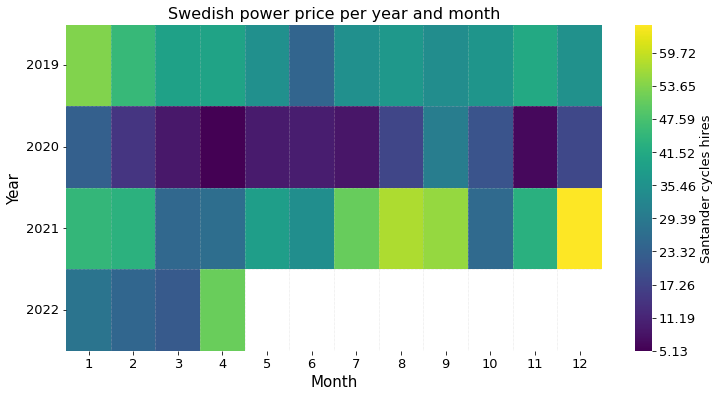

In [21]:
f, ax = plt.subplots(figsize=(12,6))

sns.heatmap(month_year, ax=ax, cmap=plt.cm.viridis, cbar_kws={'boundaries':np.arange(10000,45000,5000)})

cbax = f.axes[1]
[l.set_fontsize(13) for l in cbax.yaxis.get_ticklabels()]
cbax.set_ylabel('Santander cycles hires', fontsize=13)

[ax.axhline(x, ls=':', lw=0.5, color='0.8') for x in np.arange(1, 7)]
[ax.axvline(x, ls=':', lw=0.5, color='0.8') for x in np.arange(1, 24)];

ax.set_title('Swedish power price per year and month', fontsize=16)

[l.set_fontsize(13) for l in ax.xaxis.get_ticklabels()]
[l.set_fontsize(13) for l in ax.yaxis.get_ticklabels()]

ax.set_xlabel('Month', fontsize=15)
ax.set_ylabel('Year', fontsize=15)
ax.set_yticklabels(np.arange(2019, 2023, 1), rotation=0);

### Explore dependency on day of the week and month via carpet plot/heatmap
Produce a new heatmap showing the dependency on the day of the week and month.

In [22]:
month_day = price.copy()
month_day.loc[:,'day_of_week'] = month_day.index.dayofweek
month_day.loc[:,'month'] = month_day.index.month
month_day = month_day.groupby(['day_of_week','month']).mean().unstack()
month_day.columns = month_day.columns.droplevel(0)

month_day

month,1,2,3,4,5,6,7,8,9,10,11,12
day_of_week,,,,,,,,,,,,
0,38.275294,32.620000,23.168889,31.811765,32.487692,23.560000,32.586154,39.457857,39.693846,30.165833,36.172857,41.427692
1,36.860588,40.136875,24.832105,33.939412,31.600000,25.516429,33.047692,42.857692,45.112308,32.439231,31.812308,41.425714
2,36.608889,33.415000,23.790000,33.417059,30.606923,28.501538,31.131429,38.260833,41.265714,29.361538,22.781667,45.408571
3,41.149444,35.353125,27.377647,31.134444,27.620000,24.276667,30.323571,39.985385,40.555385,28.123571,23.318333,38.283571
4,36.527222,28.957500,24.007647,32.185556,26.287857,22.639167,33.025714,37.615385,39.010833,26.652143,29.882308,37.370000
5,36.111667,25.660000,22.147059,25.783529,24.679286,18.012308,31.635385,32.292857,36.901667,24.284286,33.733846,34.889167
6,36.107222,25.991875,21.234444,25.651875,20.837857,17.803846,28.138333,31.438571,36.343077,22.117692,32.461538,35.833846


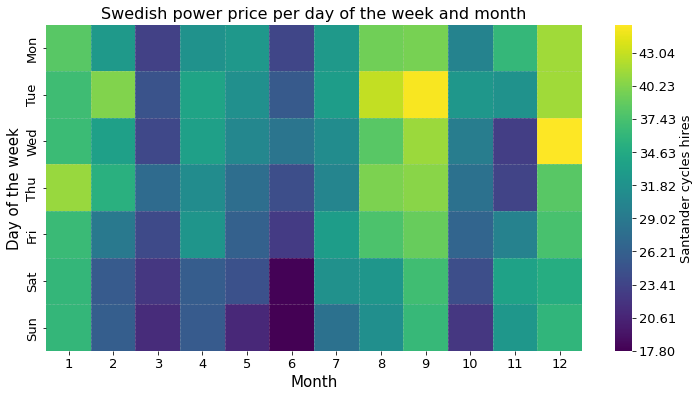

In [23]:
f, ax = plt.subplots(figsize=(12,6))

sns.heatmap(month_day, ax = ax, cmap=plt.cm.viridis, cbar_kws={'boundaries':np.arange(10000,45000,5000)})

cbax = f.axes[1]
[l.set_fontsize(13) for l in cbax.yaxis.get_ticklabels()]
cbax.set_ylabel('Santander cycles hires', fontsize=13)

[ax.axhline(x, ls=':', lw=0.5, color='0.8') for x in np.arange(1, 7)]
[ax.axvline(x, ls=':', lw=0.5, color='0.8') for x in np.arange(1, 24)];

ax.set_title('Swedish power price per day of the week and month', fontsize=16)

[l.set_fontsize(13) for l in ax.xaxis.get_ticklabels()]
[l.set_fontsize(13) for l in ax.yaxis.get_ticklabels()]

ax.set_xlabel('Month', fontsize=15)
ax.set_ylabel('Day of the week', fontsize=15)
ax.set_yticklabels(day_abbr[0:7]);

### 1.4 Explore weekdays and weekends trends

We can also explore deeper trends by looking at differences between weekdays and weekends.

Pandas DateTime indexes have a built-in method that extracts the day of week (`DataFrame.index.dayofweek`), where 0 is Monday and 6 is Sunday.

In [24]:
weekdays = price.loc[price.index.dayofweek.isin([0, 1, 2, 3, 4]), 'Price']
weekends = price.loc[price.index.dayofweek.isin([5, 6]), 'Price']
summary_month_weekdays = weekdays.groupby(weekdays.index.month).describe()
summary_month_weekends = weekends.groupby(weekends.index.month).describe()

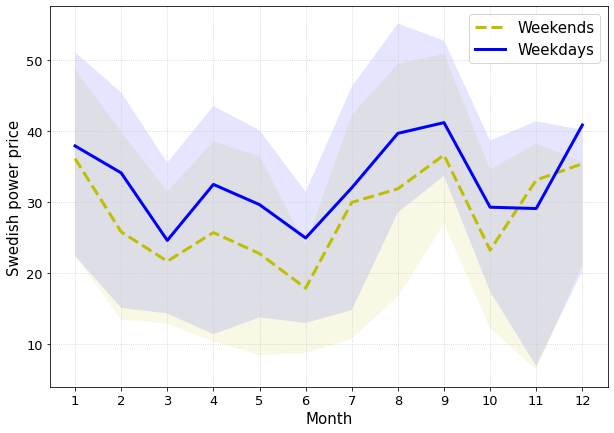

In [25]:
f, ax = plt.subplots(figsize=(10,7))

ax.plot(summary_month_weekends.index, summary_month_weekends.loc[:,'mean'], color='y', label='Weekends', ls='--', lw=3)
ax.fill_between(summary_month_weekends.index, summary_month_weekends.loc[:,'25%'], \
                summary_month_weekends.loc[:,'75%'], facecolor='y', alpha=0.1)
ax.plot(summary_month_weekdays.index, summary_month_weekdays.loc[:,'mean'], color='b', label='Weekdays', lw=3)
ax.fill_between(summary_month_weekdays.index, summary_month_weekdays.loc[:,'25%'], \
                summary_month_weekdays.loc[:,'75%'], facecolor='b', alpha=0.1)
ax.legend(fontsize=15)
ax.set_xticks(range(1,13));
ax.grid(ls=':', color='0.8')
ax.set_xlabel('Month', fontsize=15)
ax.set_ylabel('Swedish power price', fontsize=15);

[l.set_fontsize(13) for l in ax.xaxis.get_ticklabels()]
[l.set_fontsize(13) for l in ax.yaxis.get_ticklabels()]

plt.show()